# Libraries

In [21]:
from PIL import Image
import os, sys
# import splitfolders
from os import listdir
from os.path import isfile, join
import cv2
import skimage
import numpy as np
import glob
import math
import pandas as pd

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.utils import to_categorical 
from keras.optimizers import SGD,Adam,RMSprop
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

import tensorflow as tf


from matplotlib import pyplot as plt
import seaborn as sns

# LoadingNumpy Arrays

In [8]:
X_train_R=np.load('/content/X_train_R.npy')
X_test_R=np.load('/content/X_test_R.npy')
X_validation_R=np.load('/content/X_val_R.npy')

Y_train_R=np.load('/content/Y_train_R.npy')
Y_test_R=np.load('/content/Y_test_R.npy')
Y_validation_R=np.load('/content/Y_val_R.npy')


In [4]:
X_train_R.shape

(1459, 64, 64)

# Creating LSTM Model

In [122]:
# Initialising the RNN
model = Sequential()
dropout=0.3
lstm_unit=200
model.add(LSTM(units = lstm_unit, return_sequences = True, input_shape = (64,64)))
model.add(Dropout(dropout))

# Adding a second LSTM layer and Dropout layer
model.add(LSTM(units = lstm_unit, return_sequences = True))
# model.add(Dropout(dropout))

# Adding a third LSTM layer and Dropout layer
model.add(LSTM(units = lstm_unit, return_sequences = True))
model.add(Dropout(dropout))

# # Adding a fourth LSTM layer and Dropout layer
# model.add(LSTM(units = lstm_unit, return_sequences = True))
# model.add(Dropout(dropout))

# Adding a fourth LSTM layer and Dropout layer
# model.add(LSTM(units = lstm_unit, return_sequences = True))
# model.add(Dropout(dropout))

# Adding a fifth LSTM layer and Dropout layer
model.add(LSTM(units = lstm_unit))
# model.add(Dropout(dropout))

# Adding a sixth LSTM layer and and Dropout layer
# model.add(LSTM(units = 50))
# model.add(Dropout(dropout))

# Adding a fifth LSTM layer and and Dropout layer
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))



#MY
model.add(Dense(1024,activation=('relu'),input_dim=64))
model.add(Dropout(.2))

model.add(Dense(512,activation=('relu'))) 
model.add(Dropout(.2))

Dense(256,activation=('relu'))
model.add(Dropout(.2))
#MY

# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
model.add(Dense(units = 6))

learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, )#beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False
model.compile(optimizer=adam,loss='mean_squared_error',metrics=['accuracy'])#mean_squared_error mean_squared_logarithmic_error  mean_absolute_error


history=model.fit(X_train_R, Y_train_R, batch_size=128, epochs=200, validation_data=(X_validation_R, Y_validation_R))

Epoch 1/200
12/12 [==============================] - 6s 148ms/step - loss: 0.1548 - accuracy: 0.2496 - val_loss: 0.1246 - val_accuracy: 0.3222
Epoch 2/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1233 - accuracy: 0.3208 - val_loss: 0.1184 - val_accuracy: 0.3722
Epoch 3/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1207 - accuracy: 0.3747 - val_loss: 0.1167 - val_accuracy: 0.3833
Epoch 4/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1173 - accuracy: 0.3777 - val_loss: 0.1109 - val_accuracy: 0.4389
Epoch 5/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1136 - accuracy: 0.4075 - val_loss: 0.1150 - val_accuracy: 0.4056
Epoch 6/200
12/12 [==============================] - 0s 42ms/step - loss: 0.1109 - accuracy: 0.4401 - val_loss: 0.1103 - val_accuracy: 0.4222
Epoch 7/200
12/12 [==============================] - 0s 41ms/step - loss: 0.1112 - accuracy: 0.4335 - val_loss: 0.1066 - val_accuracy: 0.4722
Epoch

# Testing Accuracy

In [123]:
loss, accuracy = model.evaluate(X_test_R, Y_test_R)
print(accuracy*100)

6/6 [==============================] - 0s 7ms/step - loss: 0.0811 - accuracy: 0.7234
72.34042286872864


# Plotting Graphs

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


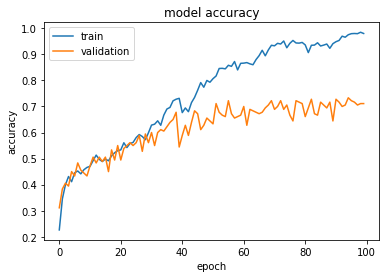

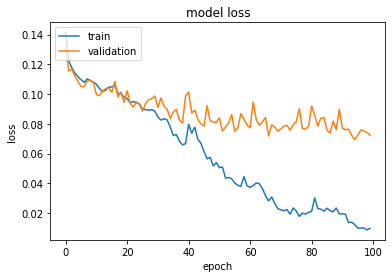

In [119]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Saving Model

In [124]:
model.save("model_LSTM_72.h5")

# Load Model

In [9]:
model=load_model("/content/model_LSTM_72.h5")


# Classification Report

In [19]:

Y_pred=model.predict(X_test_R)
Y_pred = (Y_pred > 0.5) 
report=metrics.classification_report(Y_test_R, Y_pred,output_dict=True) 
df = pd.DataFrame(report)
display(df)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0,1,2,3,4,5,micro avg,macro avg,weighted avg,samples avg
precision,0.659091,0.833333,0.791667,1.000000,0.694444,0.551724,0.737705,0.755043,0.742424,0.718085
recall,0.743590,0.869565,0.703704,0.896552,0.625000,0.533333,0.718085,0.728624,0.718085,0.718085
f1-score,0.698795,0.851064,0.745098,0.945455,0.657895,0.542373,0.727763,0.740113,0.728459,0.718085
support,39.000000,23.000000,27.000000,29.000000,40.000000,30.000000,188.000000,188.000000,188.000000,188.000000


# confusion_matrix

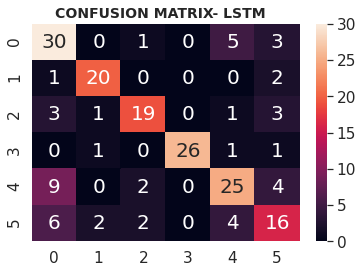

In [25]:
lstm_cf=confusion_matrix(Y_test_R.argmax(axis=1), Y_pred.argmax(axis=1))
sns.set(font_scale=1.4) # for label size
sns.heatmap(lstm_cf, annot=True, annot_kws={"size": 20}) # font size
plt.plot()
plt.title('CONFUSION MATRIX- LSTM  ',fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.show(block=False)

In [ ]:
# ***************************************---------*****************************************